In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from statsmodels.formula.api import ols

%matplotlib inline

In [10]:
dane=pd.read_csv('Dane_bank.csv', na_values='?').dropna()

In [204]:
dane.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
dane.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
dane.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


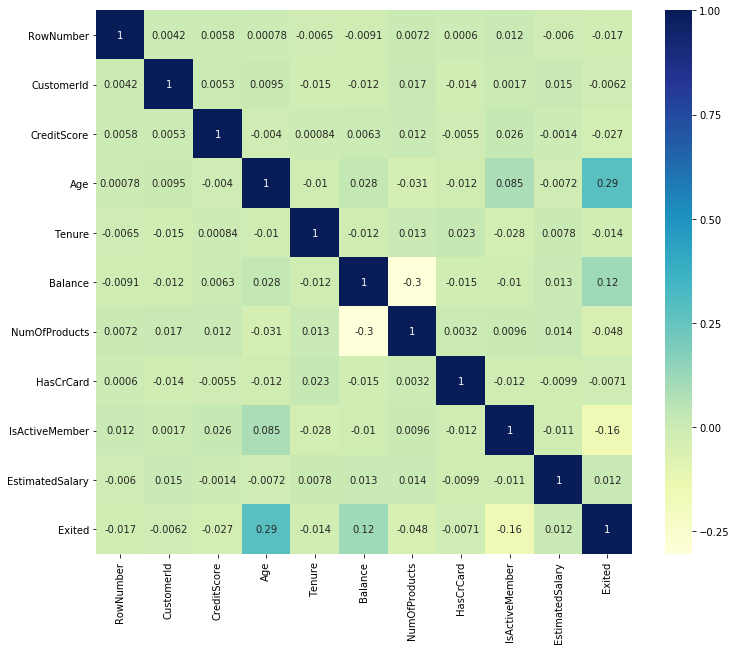

In [17]:
plt.figure(figsize=(12,10)) #rozmiar klocka
p=sns.heatmap(dane.corr(), annot=True,cmap ='YlGnBu') 

In [61]:
dane_cp=dane.copy(deep=True)
dane_cp['Gender']=dane_cp['Gender'].map({'Female':1, 'Male':0})
dane_cp=dane_cp.drop(['Surname', 'CustomerId', 'RowNumber'], axis=1)
dane_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(1)
memory usage: 937.5+ KB


In [62]:
dane_cp.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [63]:
dane_cp['Geography']=dane_cp['Geography'].map({'France':0, 'Spain':1, 'Germany':2})

In [64]:
from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X =  pd.DataFrame(sc_X.fit_transform(dane_cp.drop(["Exited"],axis = 1),), 
 #                columns=['Credit Score', 'Tenure', "Balance", 'Estimated Salary'])

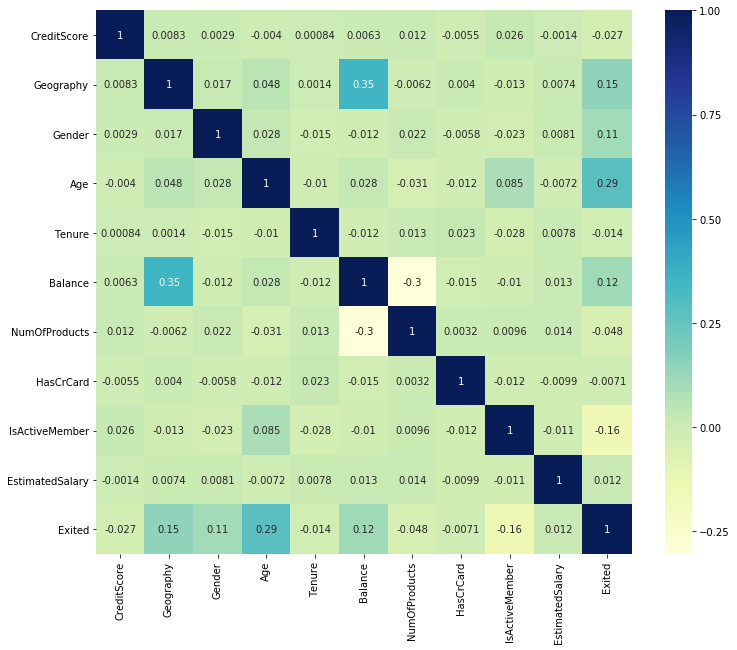

In [65]:
plt.figure(figsize=(12,10)) #rozmiar klocka
p=sns.heatmap(dane_cp.corr(), annot=True,cmap ='YlGnBu') 

## Regresja logistyczna

In [214]:
X=dane_cp.iloc[:, :8]
y=dane_cp.iloc[:, 10]

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [215]:
y_test.shape

(3000,)

In [216]:
y_train.sum()/100

14.26

In [217]:
y_test.sum()/100

6.11

In [218]:
dane_cp['Exited'].sum()/100

20.37

In [219]:
log_reg=LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [224]:
print(log_reg.densify())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [192]:
y_pred=log_reg.predict(X_test)

In [227]:
log_reg.coef_, dane_cp.keys()

(array([[-5.03582295e-03,  1.95478223e-03,  9.85795347e-04,
          4.04014141e-02, -8.57278100e-04,  3.53557071e-06,
         -4.34783463e-04, -2.29904824e-04]]),
 Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
        'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
        'Exited'],
       dtype='object'))

In [194]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2389
           1       0.46      0.05      0.09       611

    accuracy                           0.79      3000
   macro avg       0.63      0.52      0.49      3000
weighted avg       0.73      0.79      0.72      3000



In [195]:
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2352,37,2389
1,579,32,611
All,2931,69,3000


## KNN

In [196]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,30):  #dla bardzo wielu k od 1 do 14

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [197]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.53333333333333 % and k = [22]


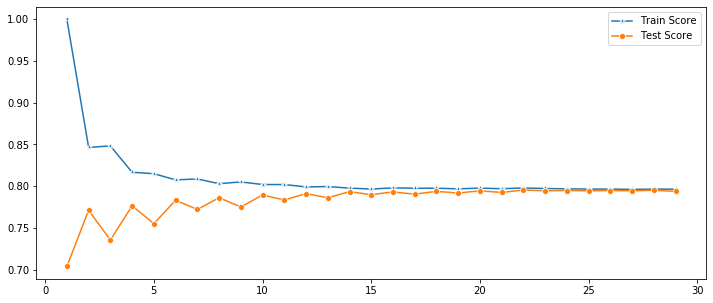

In [199]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,30),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,30),test_scores,marker='o',label='Test Score')

In [200]:
knn = KNeighborsClassifier(22)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7953333333333333

In [201]:
y_pred=log_reg.predict(X_test)

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2389
           1       0.46      0.05      0.09       611

    accuracy                           0.79      3000
   macro avg       0.63      0.52      0.49      3000
weighted avg       0.73      0.79      0.72      3000



In [203]:
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2352,37,2389
1,579,32,611
All,2931,69,3000
